# **ACTIVIDAD SEMANA 4**
# Ciencia y Analítica de Datos

# Equipo 170 

Freddy Armendariz Herrera - A01793672

Samuel Elías Flores González - A01793668

**Profesor Titular:** Jobish Vallikavungal Devassia

**Profesor Tutor:** Juan Miguel Meza Méndez

Fecha: 11 de Octubre del 2022

##**Importación de la Base de Datos**

Se importan las librerías a utilizar.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Definimos la ruta en donde se encuentra la base de datos, en este caso es un URL.

In [ ]:
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Se procede a convertir la base de datos en un DataFrame.

In [ ]:
df_credit = pd.read_csv(inPath)         #Leemos el contenido del archivo y lo almacenamos en un dataframe
df = df_credit.copy()                   #Creamos copia del dataframe
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


##**Limpieza de los Datos**

Renombramos las columnas para la identificación de las variables categóricas

In [ ]:
df = df.rename(columns = {'X1' : 'Amount_Credit', 
                          'X2' : 'Gender',
                          'X3' : 'Education',
                          'X4' : 'Marital_Status',
                          'X5' : 'Age',
                          'X6' : 'Payment_Sep_2005',
                          'X7' : 'Payment_Aug_2005',
                          'X8' : 'Payment_Jul_2005',
                          'X9' : 'Payment_Jun_2005',
                          'X10' : 'Payment_May_2005',
                          'X11' : 'Payment_Apr_2005',
                          'X12' : 'Bill_State_Sep_2005',
                          'X13' : 'Bill_State_Aug_2005',
                          'X14' : 'Bill_State_Jul_2005',
                          'X15' : 'Bill_State_Jun_2005',
                          'X16' : 'Bill_State_May_2005',
                          'X17' : 'Bill_State_Apr_2005',
                          'X18' : 'Previous_Pay_Sep_2005',
                          'X19' : 'Previous_Pay_Aug_2005',
                          'X20' : 'Previous_Pay_Jul_2005',
                          'X21' : 'Previous_Pay_Jun_2005',
                          'X22' : 'Previous_Pay_May_2005',
                          'X23' : 'Previous_Pay_Apr_2005' }, 
               inplace = False
               )

Ahora intentamos definir cuales son las variables categóricas usando df.info(), sin embargo al ejecutarlo, observamos que todos los datos son de tipo entero y flotante. 

Para saber cuales son categóricas nos valdremos de la descripción de la base de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     30000 non-null  int64  
 1   Amount_Credit          30000 non-null  int64  
 2   Gender                 29999 non-null  float64
 3   Education              29998 non-null  float64
 4   Marital_Status         29998 non-null  float64
 5   Age                    29995 non-null  float64
 6   Payment_Sep_2005       29997 non-null  float64
 7   Payment_Aug_2005       29995 non-null  float64
 8   Payment_Jul_2005       29993 non-null  float64
 9   Payment_Jun_2005       29991 non-null  float64
 10  Payment_May_2005       29984 non-null  float64
 11  Payment_Apr_2005       29986 non-null  float64
 12  Bill_State_Sep_2005    29989 non-null  float64
 13  Bill_State_Aug_2005    29989 non-null  float64
 14  Bill_State_Jul_2005    29987 non-null  float64
 15  Bi

Después de leer y analizar las descripciones, determinamos que las siguientes columnas son categoricas:

Gender, Education, Marital status, Age, Payment september - April 2005

ya que sabemos cuales son las variables categóricas, procedemos a eliminar las variables categóricas, puesto que solo nos interesan las numéricas


In [ ]:
df = df.drop(['ID', 'Gender', 'Education', 'Marital_Status', 'Age', 'Payment_Sep_2005', 'Payment_Aug_2005', 'Payment_Jul_2005', 'Payment_Jun_2005', 'Payment_May_2005', 'Payment_Apr_2005', 'Y'], axis =1 )

In [ ]:
df #Dataframe resultante solo con variables numericas

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Verificamos la existencia de datos nulos en el dataframe y los eliminamos


In [ ]:
df.isna().values.any()     #True = Si hay valores nulos 

True

In [ ]:
df.dropna(inplace = True)  #Eliminamos los datos NaN
df.isna().values.any()     #Se corrobora siq uedo algún dato vacío, False = No hay datos nulos

False

In [ ]:
df #Dataframe resultante sin datos vacios o nulos

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,20000,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Vemos que los datos que se eliminaron fueron solo 26 lo que representan el 0.08% de los datos.

Así que esto no debería afectarnos.

In [ ]:
df.shape #Mostramos el tamaño del dataframe

(29974, 13)

##**Normalización de los Datos**

Procedemos a mostrar la correlacion del dataframe resultante.

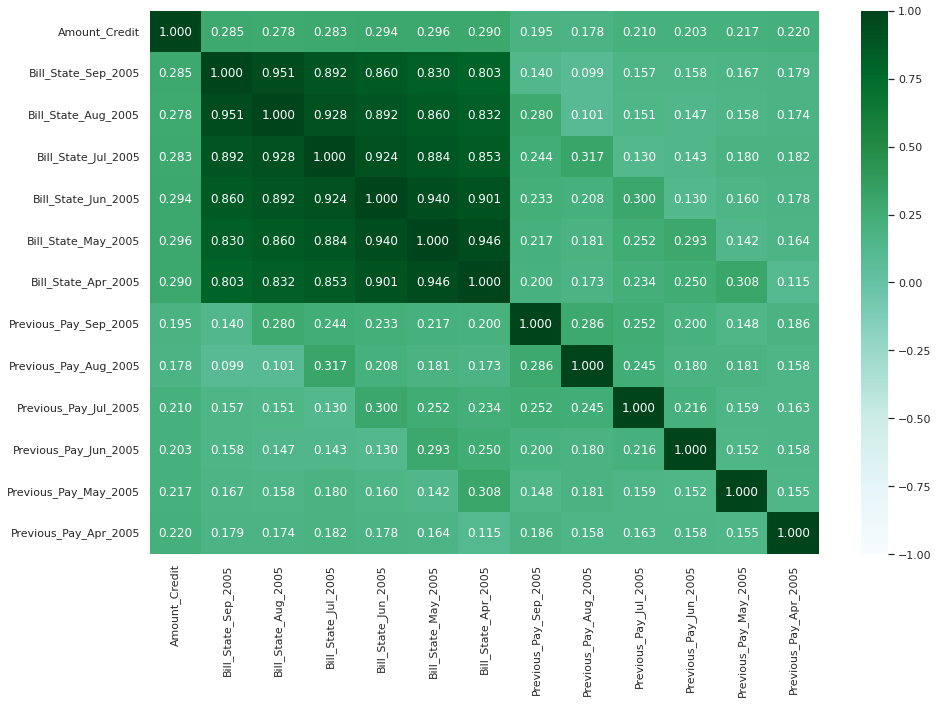

In [ ]:
df.corr()
corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, fmt=".3f")

En consiguiente, se cálcula la varianza que presenta cada una de las columnas.

In [ ]:
print('Varianza correspondiente a cada columna:')
print(df.var())
print('\nTotal de varianza: ',sum(df.var()))
print('\nProporcion de varianza de cada columna:')
print(np.round(df.var()/sum(df.var()),3)*100)

Varianza correspondiente a cada columna:
Amount_Credit            1.683332e+10
Bill_State_Sep_2005      5.425779e+09
Bill_State_Aug_2005      5.069104e+09
Bill_State_Jul_2005      4.812499e+09
Bill_State_Jun_2005      4.141468e+09
Bill_State_May_2005      3.698675e+09
Bill_State_Apr_2005      3.549014e+09
Previous_Pay_Sep_2005    2.745255e+08
Previous_Pay_Aug_2005    5.313227e+08
Previous_Pay_Jul_2005    3.102319e+08
Previous_Pay_Jun_2005    2.456257e+08
Previous_Pay_May_2005    2.336060e+08
Previous_Pay_Apr_2005    3.162939e+08
dtype: float64

Total de varianza:  45441462455.59024

Proporcion de varianza de cada columna:
Amount_Credit            37.0
Bill_State_Sep_2005      11.9
Bill_State_Aug_2005      11.2
Bill_State_Jul_2005      10.6
Bill_State_Jun_2005       9.1
Bill_State_May_2005       8.1
Bill_State_Apr_2005       7.8
Previous_Pay_Sep_2005     0.6
Previous_Pay_Aug_2005     1.2
Previous_Pay_Jul_2005     0.7
Previous_Pay_Jun_2005     0.5
Previous_Pay_May_2005     0.5
Previous_P

No nos podemos fiar de estos valores de varianza ya que cada una de las columnas tiene diferentes magnitudes, entonces la varianza presentará gran diferencia de unos contra otros, por lo que se procede a escalar los datos.

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.shape
scaled_df

,Amount_Credit,Bill_State_Sep_2005,Bill_State_Aug_2005,Bill_State_Jul_2005,Bill_State_Jun_2005,Bill_State_May_2005,Bill_State_Apr_2005,Previous_Pay_Sep_2005,Previous_Pay_Aug_2005,Previous_Pay_Jul_2005,Previous_Pay_Jun_2005,Previous_Pay_May_2005,Previous_Pay_Apr_2005
0,0.010101,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29969,0.212121,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29970,0.141414,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29971,0.020202,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29972,0.070707,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


Teniendo el nuevo dataframe escalado, se calculan nuevamente las varianzas.

In [ ]:
print('Varianza correspondiente a cada columna:')
print(scaled_df.var())
print('\nTotal de varianza: ',sum(scaled_df.var()))
print('\nProporcion de varianza de cada columna:')
print(np.round(scaled_df.var()/sum(scaled_df.var()),3)*100)

Varianza correspondiente a cada columna:
Amount_Credit            0.017175
Bill_State_Sep_2005      0.004248
Bill_State_Aug_2005      0.004566
Bill_State_Jul_2005      0.001451
Bill_State_Jun_2005      0.003675
Bill_State_May_2005      0.003637
Bill_State_Apr_2005      0.002096
Previous_Pay_Sep_2005    0.000360
Previous_Pay_Aug_2005    0.000187
Previous_Pay_Jul_2005    0.000386
Previous_Pay_Jun_2005    0.000637
Previous_Pay_May_2005    0.001284
Previous_Pay_Apr_2005    0.001132
dtype: float64

Total de varianza:  0.04083333517438251

Proporcion de varianza de cada columna:
Amount_Credit            42.1
Bill_State_Sep_2005      10.4
Bill_State_Aug_2005      11.2
Bill_State_Jul_2005       3.6
Bill_State_Jun_2005       9.0
Bill_State_May_2005       8.9
Bill_State_Apr_2005       5.1
Previous_Pay_Sep_2005     0.9
Previous_Pay_Aug_2005     0.5
Previous_Pay_Jul_2005     0.9
Previous_Pay_Jun_2005     1.6
Previous_Pay_May_2005     3.1
Previous_Pay_Apr_2005     2.8
dtype: float64


Se observa como la varianza disminuye en el dataframe escalado, mientras que la proporción de varianza se mantiene casi igual al original.

##**Parte 1: Ejercicio Guiado**

Revise el ejercicio guiado para el análisis de las componentes principales utilizando el conjunto de datos.

###1. **Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**
  * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Ya que tenemos nuestros datos limpios y escalados, podemos proceder con PCA.

El analisis de componentes principales nos ayuda a determinar las componentes más importantes de nuestras variables.

In [ ]:
pcs = PCA() #Aplicamos PCA
pcs_t = pcs.fit_transform(scaled_df)
pcs_t

array([[-1.70230640e-01,  4.55118497e-02, -1.12773345e-04, ...,
         3.56490949e-04,  3.40005394e-04,  6.78803398e-04],
       [-9.90828503e-02, -2.61272959e-02, -4.67002684e-03, ...,
         7.05412475e-04, -2.84197394e-04, -3.55040540e-05],
       [-9.70277613e-02,  1.67836756e-02, -1.47701003e-03, ...,
        -5.17613084e-03, -1.22206511e-03, -4.12677690e-04],
       ...,
       [-1.45306895e-01,  5.30982832e-02,  1.57796793e-02, ...,
         4.14087811e-03,  9.02824325e-04, -1.48735298e-03],
       [-5.78274009e-02,  5.70240238e-02,  1.07138661e-01, ...,
        -1.27860937e-02, -7.88658081e-03, -9.97405048e-03],
       [-9.19259042e-02,  7.78112559e-02, -8.01449018e-03, ...,
        -4.71047463e-05,  7.39248028e-03, -2.00925001e-03]])

Procedemos a calcular los valores de varianza.

In [ ]:
pcsSummary_df = pd.DataFrame({'% Varianza Explicada': np.round(pcs.explained_variance_,6) * 100,
                               "Desviación Estándar": np.round(np.sqrt(pcs.explained_variance_),3),
                               "%Proporción de Varianza": np.round(pcs.explained_variance_ratio_,3)*100,
                               '% Varianza Acumulada': np.round(np.cumsum(pcs.explained_variance_ratio_),3)*100                              
                              }) 
pcsSummary_df

,% Varianza Explicada,Desviación Estándar,%Proporción de Varianza,% Varianza Acumulada
0,2.3075,0.152,56.5,56.5
1,1.2227,0.111,29.9,86.5
2,0.1355,0.037,3.3,89.8
3,0.1137,0.034,2.8,92.6
4,0.1021,0.032,2.5,95.1
5,0.0615,0.025,1.5,96.6
6,0.0441,0.021,1.1,97.6
7,0.0352,0.019,0.9,98.5
8,0.0244,0.016,0.6,99.1
9,0.0144,0.012,0.4,99.5


Cambiamos el nombre de las componentes principales.

In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% Varianza Explicada,Desviación Estándar,%Proporción de Varianza,% Varianza Acumulada
PC1,2.3075,0.152,56.5,56.5
PC2,1.2227,0.111,29.9,86.5
PC3,0.1355,0.037,3.3,89.8
PC4,0.1137,0.034,2.8,92.6
PC5,0.1021,0.032,2.5,95.1
PC6,0.0615,0.025,1.5,96.6
PC7,0.0441,0.021,1.1,97.6
PC8,0.0352,0.019,0.9,98.5
PC9,0.0244,0.016,0.6,99.1
PC10,0.0144,0.012,0.4,99.5


In [ ]:
pcsSummary_df = pcsSummary_df.round(2).transpose()
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
% Varianza Explicada,2.31,1.22,0.14,0.11,0.10,0.06,0.04,0.04,0.02,0.01,0.01,0.01,0.00
Desviación Estándar,0.15,0.11,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01
%Proporción de Varianza,56.50,29.90,3.30,2.80,2.50,1.50,1.10,0.90,0.60,0.40,0.30,0.20,0.10
% Varianza Acumulada,56.50,86.50,89.80,92.60,95.10,96.60,97.60,98.50,99.10,99.50,99.70,99.90,100.00


Representamos los datos de varianza de las componentes en un gráfico de sedimentación.

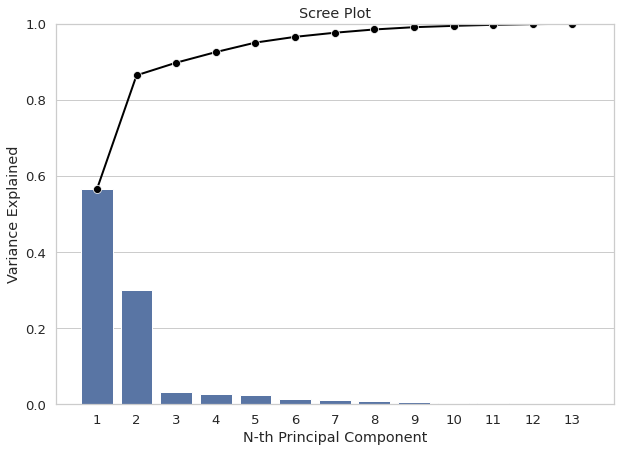

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

**Respuesta:**

El número mínimo de componentes principales que representan la mayor parte de la variación de nuestros datos son las primeras 3 componentes los cuales nos dan una varianza acumulada de 89.8%. A partir del componente número 4 el porcentaje de varianza que aporta cada componente es muy pequeño comparado con los primeros antes mencionados.

###2. **Interprete cada componente principal en términos de las variables originales.**
  * Examine la magnitud y la dirección de los coeficientes de las variables originales.
  
  Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
                                index=df.columns
                                )
pcsComponents_df.round(3 )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Amount_Credit,0.681,-0.727,-0.077,-0.022,-0.025,-0.015,-0.015,-0.011,-0.004,-0.004,0.005,-0.001,-0.001
Bill_State_Sep_2005,0.334,0.317,-0.194,0.424,-0.229,0.231,-0.205,0.366,0.088,0.311,-0.422,-0.053,-0.058
Bill_State_Aug_2005,0.350,0.343,-0.177,0.329,-0.161,0.106,0.276,-0.225,-0.271,-0.218,0.494,0.102,0.285
Bill_State_Jul_2005,0.196,0.188,-0.021,0.041,-0.012,-0.106,0.105,-0.246,0.534,0.007,0.244,0.015,-0.704
Bill_State_Jun_2005,0.317,0.298,0.028,-0.227,0.155,-0.395,0.138,0.194,0.187,-0.518,-0.296,-0.305,0.191
Bill_State_May_2005,0.313,0.290,0.095,-0.429,0.260,0.074,-0.197,-0.099,-0.128,0.111,-0.130,0.677,-0.001
Bill_State_Apr_2005,0.232,0.212,0.240,-0.332,-0.026,-0.020,-0.232,-0.136,-0.259,0.432,0.237,-0.592,-0.011
Previous_Pay_Sep_2005,0.034,0.004,0.097,0.028,0.092,0.054,0.712,-0.322,-0.245,0.247,-0.473,-0.072,-0.130
Previous_Pay_Aug_2005,0.020,-0.002,0.094,-0.031,0.064,-0.030,0.223,-0.031,0.626,0.443,0.125,0.069,0.571
Previous_Pay_Jul_2005,0.035,-0.001,0.140,-0.095,0.141,-0.017,0.406,0.762,-0.148,0.145,0.336,0.093,-0.198


In [ ]:
pcsComponents_df.PC1.abs().idxmax()

'Amount_Credit'

In [ ]:
pcsComponents_df.PC2.abs().idxmax()

'Amount_Credit'

**Respuesta:**

En base a la tabla los coeficientes podemos observar que la variable con mas peso en las dos primeras componentes es el monto de credito. Tomando en cuenta que las primeras 2 componentes son las que aportan la mayor parte de la varianza


###3. **Identifique los valores atípicos.**
  * Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

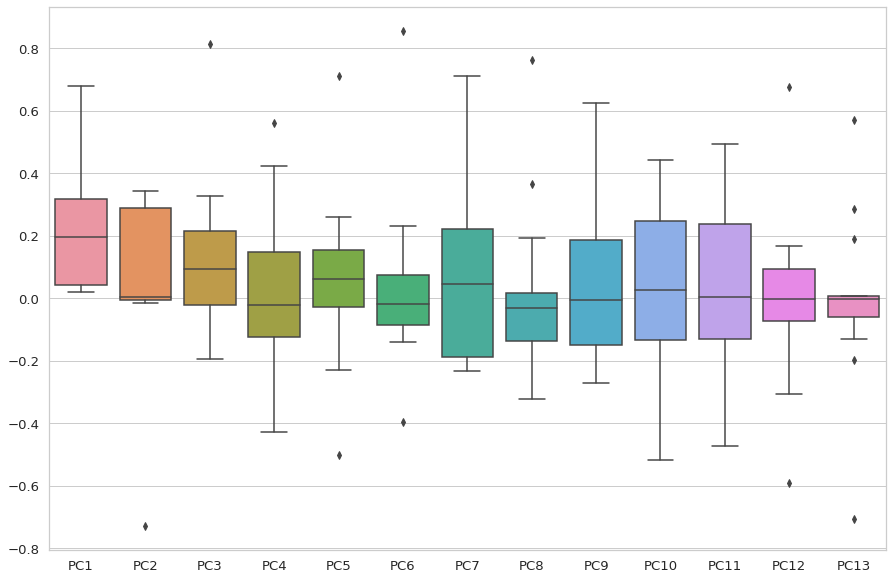

In [ ]:
sns.boxplot(data = pcsComponents_df, orient="v")
plt.show()

**Respuesta:**

En las primeras 3 componentes observamos que en PC2 y PC3 hay 1 outlier en cada uno de ellos. en PC2 el outlier se encuentra rondando -0.7 y el outlier de PC3 se encuentra en 0.8



##**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

###1. **¿Cuál es el número de componentes mínimo y por qué?**

El número de componentes mínimo se resume en 3 ya que estas absorben el 89.8% de la variación en los datos, mientras que las demás individualmente no provocan ningún cambio significativo. A partir del componente PC4 los valores de la proporcion de la varianza son menores al 3%, donde el ultimo componente tan solo nos aporta el 0.1%.


###2. **¿Cuál es la variación de los datos que representan esos componentes?**
Variación por cada componente:

PC1: 56.5%

PC2: 29.9%

PC3: 3.3%

Estas 3 componentes en conjunto nos representan una varianza acumulada del 89.8%.

###3. **¿Cuál es la pérdida de información después de realizar PCA?**

Tomando en cuenta que estamos utilizando los primeros 3 componentes PC1, PC2 y PC3,  los cuales nos representan un 89.8% de varianza, podemos decir que estamos teniendo una pérdida de información del 10.2%. 

###4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Amount_Credit tiene mayor importancia (definidad por su magnitud) en las primeras dos componentes (PC1 y PC2) mientras que Previous_Pay_May_2005 tiene mayor importancia en la tercera componente (PC3)

Previous_Pay_Aug_2005 tiene menor importancia en PC1, Previous_Pay_Jul_2005 en PC2 y Bill_State_Jul_2005

Resumen:

**Mas importante:** PC1: Amount_Credit (0.681), PC2: Amount_Credit (-0.727), PC3: Previous_Pay_May_2005 (0.816)

**Menos importante:** PC1: Previous_Pay_Aug_2005 (0.020), PC2: Previous_Pay_Jul_2005 (-0.001), PC3: Bill_State_Jul_2005 (-0.021)



###5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Cuando se requiere reducir la cantidad de ruido que se tiene en el conjunto de datos y para poder visualizar los datos que se tienen en demasiadas dimensiones, solamente en dos, con dimensiones se refiere a la cantidad de características o columnas.

Se vuelve demasiado importante en el aprendizaje automático ya que no solamente se alimenta al algoritmo con un conjunto de datos indiferentes, sino que estos datos se tienen que preprocesar con el fin de que nuestro algoritmo pueda entender y encontrar patrones para entrenarse de una forma más rápida, fácil y eficiente.